## Sampling Techniques

We will examine 4 different sampling methods and compare the results to the original data:

    1) Sample 1% of the data (5 data points)
    2) Sample 1% of the data repeadately 100 times (100 x 5 data points)
    3) Sample 10% of the data (51 data points)
    4) Sample calculated based on a confidence level of 95% and margin of error of 5% (219 data points)

In [1]:
library(MASS)

In [2]:
data(Boston)

In [3]:
dim(Boston)

[1] 506  14

In [4]:
head(Boston)

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [5]:
Boston$medv <- NULL

In [6]:
install.packages('moments')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [7]:
library(moments)

In [8]:
library(dplyr, warn.conflicts = FALSE)

In [9]:
sample_1_pct <- sample_n(Boston, 5)

In [10]:
sample_100x_1_pct<- colMeans(sample_n(Boston, 5))

for (i in 1:99) {
    sample_100x_1_pct <- (sample_100x_1_pct*(i) + colMeans(sample_n(Boston, 5)))/(i+1)
}

In [11]:
sample_10_pct <- sample_n(Boston, 51)

In [12]:
sample_95_5 <- sample_n(Boston, 219)

In [13]:
stats = data.frame(feature=colnames(Boston))
stats['mean_dataset'] = sapply(Boston, mean)
stats['sd_dataset'] = sapply(Boston, sd)
stats['skewness_dataset'] = sapply(Boston, skewness)

stats['mean_sample_1_pct'] = sapply(sample_1_pct, mean)
stats['mean_sample_100x_1_pct'] = sapply(sample_100x_1_pct, mean)
stats['mean_sample_10_pct'] = sapply(sample_10_pct, mean)
stats['mean_sample_95_5'] = sapply(sample_95_5,mean)

In [14]:
stats

feature,mean_dataset,sd_dataset,skewness_dataset,mean_sample_1_pct,mean_sample_100x_1_pct,mean_sample_10_pct,mean_sample_95_5
crim,3.61352356,8.6015451,5.2076524,0.105654,3.6833727,2.53872392,3.04115416
zn,11.36363636,23.3224530,2.2190631,34.400000,12.2750000,10.69607843,11.75342466
indus,11.13677866,6.8603529,0.2941463,9.580000,11.0885200,10.80450980,10.79986301
chas,0.06916996,0.2539940,3.3957993,0.000000,0.0520000,0.07843137,0.06392694
nox,0.55469506,0.1158777,0.7271442,0.470000,0.5484476,0.54439020,0.55066621
rm,6.28463439,0.7026171,0.4024147,6.324600,6.2411780,6.24335294,6.30356164
age,68.57490119,28.1488614,-0.5971856,42.000000,67.4354000,68.29019608,67.26940639
dis,3.79504269,2.1057101,1.0087788,7.199960,3.7774464,3.82825490,3.85875251
rad,9.54940711,8.7072594,1.0018335,4.800000,9.2260000,8.58823529,9.24657534
tax,408.23715415,168.5371161,0.6679683,383.200000,406.7040000,385.78431373,392.56621005


In [15]:
library(reshape2)
library(ggplot2)

Using feature as id variables


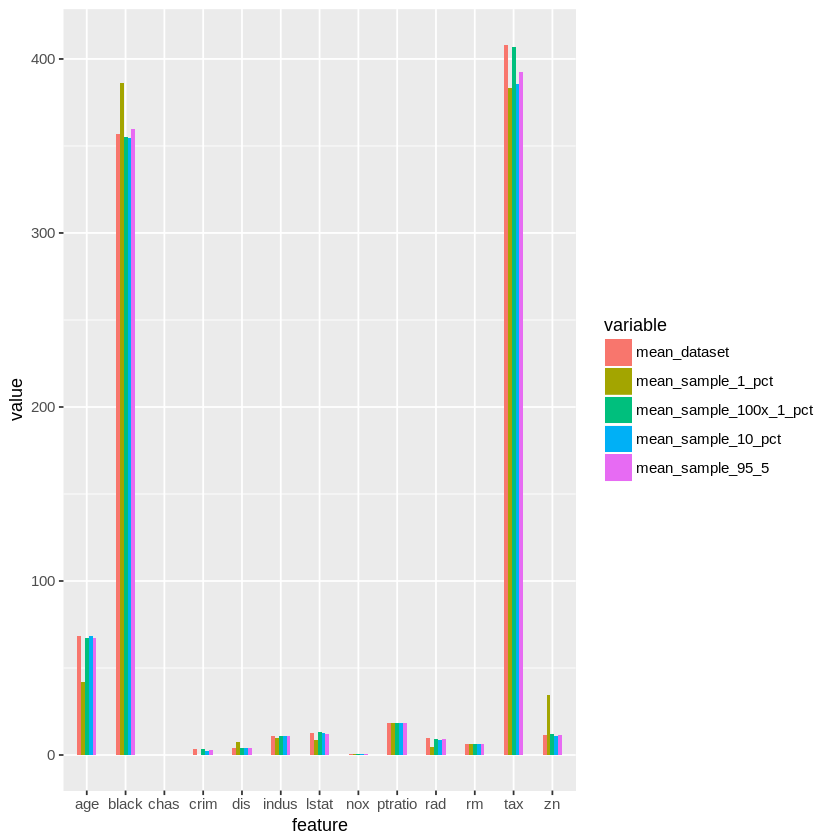

In [16]:
ggplot(melt(stats[,c('feature','mean_dataset','mean_sample_1_pct','mean_sample_100x_1_pct','mean_sample_10_pct','mean_sample_95_5')]), aes(x = feature, y = value, fill = variable)) + 
    geom_bar(stat = "identity", width=0.5, position = "dodge")

In [17]:
zscores = data.frame(feature=colnames(sample_1_pct))

In [18]:
zscores['sample_1_pct'] <- (colMeans(sample_1_pct) - stats$mean_dataset)/stats$sd_dataset

In [19]:
zscores['sample_100x_1_pct'] <- (sample_100x_1_pct-stats$mean_dataset)/stats$sd_dataset

In [20]:
zscores['sample_10_pct'] <- (colMeans(sample_10_pct) - stats$mean_dataset)/stats$sd_dataset

In [21]:
zscores['sample_95_5'] <- (colMeans(sample_95_5) - stats$mean_dataset)/stats$sd_dataset

In [22]:
zscores

feature,sample_1_pct,sample_100x_1_pct,sample_10_pct,sample_95_5
crim,-0.40781854,0.008120530,-0.124954252,-0.06654263
zn,0.98773331,0.039076663,-0.028622973,0.01671301
indus,-0.22692399,-0.007034428,-0.048433201,-0.04911054
chas,-0.27232907,-0.067599855,0.036463108,-0.02064229
nox,-0.73090057,-0.053914261,-0.088928805,-0.03476812
rm,0.05688107,-0.061849313,-0.058753827,0.02693822
age,-0.94408441,-0.040481253,-0.010114267,-0.04637825
dis,1.61699242,-0.008356463,0.015772453,0.03025574
rad,-0.54545373,-0.037142240,-0.110387411,-0.03477923
tax,-0.14855573,-0.009096834,-0.133221933,-0.09298215


Using feature as id variables


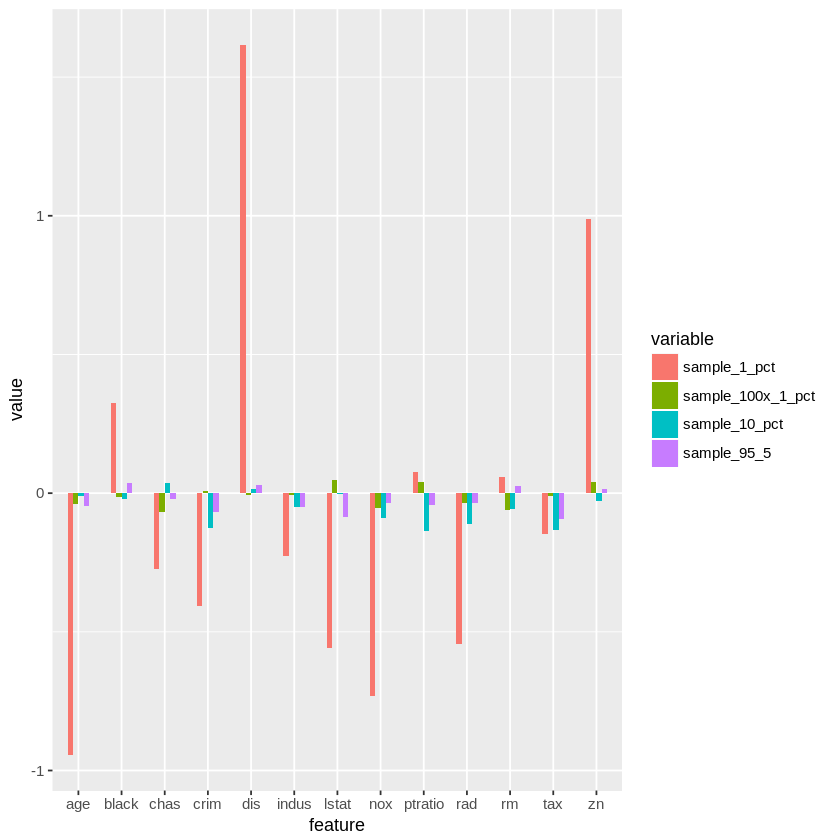

In [23]:
ggplot(melt(zscores), aes(x = feature, y = value, fill = variable)) + 
    geom_bar(stat = "identity", width=0.5, position = "dodge")

### Sampling Technique Selection

From the z-score table above we can order the desired results as:

    1) sample_95_5 (Sample calculated based on a confidence level of 95% and margin of error of 5%)
    2) sample_100x_1pct (Sample 1% of the data repeadately 100 times)
    3) sample_10_pct (10% of the data)
    4) sample_1_pct (1% of the data)

Any of the first 3 sampling techniques should give us adequate results.